In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency, somersd

python(51874) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [66]:
import pandas as pd

# Load the datasets
articles_df = pd.read_excel('/Users/helgegeurtjacobusmoes/Desktop/thesis data/1000_Random_Articles.xlsx')
thesis_df = pd.read_excel('/Users/helgegeurtjacobusmoes/Desktop/thesis data/Official_Thesis_Coding.xlsx')

# Display the first few rows of each dataframe to understand their structure
articles_df.head(), thesis_df.head()

# List the columns in both dataframes
articles_columns = articles_df.columns
thesis_columns = thesis_df.columns

articles_columns, thesis_columns

# Converting the 'Publication Date' column to datetime with dayfirst=True
articles_df['Publication Date'] = pd.to_datetime(articles_df['Publication Date'], dayfirst=True)

# Convert the 'Publication Date' column to dd.mm.yyyy format
articles_df['Publication Date'] = articles_df['Publication Date'].dt.strftime('%d.%m.%Y')

# Merging the articles_df with the relevant columns from thesis_df (Q1 to Q9)

# Extracting the relevant columns from thesis_df
relevant_thesis_df = thesis_df[['Q1 - AI Act 4', 'Q2 - AI Act 3', 'Q3 - AI Act 2', 'Q4 - AI Act 1',
                                'Q5 - Risk Presence', 'Q6 - Risk Level 4', 'Q7 - Risk Level 3',
                                'Q8 - Risk Level 2', 'Q9 - Risk Level 1']]

# Replacing NaN values with 0 in the relevant columns
relevant_thesis_df = relevant_thesis_df.fillna(0).astype(int)

# Creating new columns 'AI Act' and 'Risk'
def determine_ai_act(row):
    if row['Q1 - AI Act 4'] == 1:
        return 4
    elif row['Q2 - AI Act 3'] == 1:
        return 3
    elif row['Q3 - AI Act 2'] == 1:
        return 2
    elif row['Q4 - AI Act 1'] == 1:
        return 1
    else:
        return 0

def determine_risk(row):
    if row['Q6 - Risk Level 4'] == 1:
        return 4
    elif row['Q7 - Risk Level 3'] == 1:
        return 3
    elif row['Q8 - Risk Level 2'] == 1:
        return 2
    elif row['Q9 - Risk Level 1'] == 1:
        return 1
    else:
        return 0

relevant_thesis_df['AI Act'] = relevant_thesis_df.apply(determine_ai_act, axis=1)
relevant_thesis_df['Risk'] = relevant_thesis_df.apply(determine_risk, axis=1)

# Creating new columns 'Updated AI Act' and 'Updated Risk'
def updated_ai_act(ai_act):
    mapping = {0: 0, 1: 0, 2: 1, 3: 2, 4: 3}
    return mapping.get(ai_act, 0)

def updated_risk(risk):
    mapping = {0: 0, 1: 0, 2: 1, 3: 2, 4: 3}
    return mapping.get(risk, 0)

relevant_thesis_df['Updated AI Act'] = relevant_thesis_df['AI Act'].apply(updated_ai_act)
relevant_thesis_df['Updated Risk'] = relevant_thesis_df['Risk'].apply(updated_risk)

# Adding the 'AI Act - Risk' column
def calculate_ai_act_risk(row):
    if row['Updated AI Act'] == 0 and row['Updated Risk'] == 0:
        return 0
    else:
        return row['Updated AI Act'] - row['Updated Risk']

relevant_thesis_df['AI Act - Risk'] = relevant_thesis_df.apply(calculate_ai_act_risk, axis=1)

# Merging the dataframes; this assumes a one-to-one merge, which may need adjustment based on further clarification
merged_df = articles_df.join(relevant_thesis_df)

# Display the first few rows of the merged dataframe
merged_df

,Headline,Publication,URL,News Outlet,Type of News,Word Count,Body,Publication Date,Combined,Topic,...,Q5 - Risk Presence,Q6 - Risk Level 4,Q7 - Risk Level 3,Q8 - Risk Level 2,Q9 - Risk Level 1,AI Act,Risk,Updated AI Act,Updated Risk,AI Act - Risk
0,Zelfrijdende auto binnen vijf jaar in de stad',"AD/Algemeen Dagblad, Auto; Blz. 26, 27, 744 words",https://advance.lexis.com/api/document?collect...,AD/Algemeen Dagblad,Auto,744,Computer wordt perfecte bestuurder\nBijna alle...,15.04.2016,zelfrijdende auto binnen vijf jaar stad comput...,0,...,1,0,0,0,1,3,1,2,0,2
1,Van oermens tot kunstmatige intelligentie 2020...,"NRC.NEXT, WETENSCHAP; Blz. 1, 1640 words",https://advance.lexis.com/api/document?collect...,NRC,WETENSCHAP,1640,Vooruitblik 2020 Wat kunnen we verwachten van ...,04.01.2020,oermens kunstmatige intelligentie klimaat cris...,0,...,0,0,0,0,0,1,0,0,0,0
2,"De technologie gaat zo hard, dat een robot ove...","Het Financieele Dagblad, NIEUWS; Blz. 20, 984 ...",https://advance.lexis.com/api/document?collect...,Het Financieele Dagblad,NIEUWS,984,GEKKOGRIJPERS\nVan onze redacteur\nDallas\nRob...,26.07.2019,technologie gaat hard robot drie jaar bijna ge...,0,...,1,0,0,1,0,3,2,2,1,1
3,Robot bij verkoopgesprek,"De Telegraaf, FINANCIEEL; Blz. 24, 519 words",https://advance.lexis.com/api/document?collect...,De Telegraaf,FINANCIEEL,519,Expert ’Vanaf 2025 gaan computers met elkaar o...,13.02.2019,robot verkoopgesprek expert vanaf gaan compute...,0,...,0,0,0,0,0,3,0,2,0,2
4,Wondere wereld op wielen Kunstmatige intellige...,"De Telegraaf, BINNENLAND; Blz. 7, 821 words",https://advance.lexis.com/api/document?collect...,De Telegraaf,BINNENLAND,821,Kunstmatige intelligentie domineert grootste t...,11.01.2024,wondere wereld wielen kunstmatige intelligenti...,0,...,0,0,0,0,0,3,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,De binnenvaart zoeft straks op batterijen,"Trouw, Economie; Blz. 17, 642 words",https://advance.lexis.com/api/document?collect...,Trouw,Economie,642,Nog even en dan vaart de Tesla van de binnenva...,29.11.2018,binnenvaart zoeft straks batterijen even vaart...,9,...,1,0,0,1,0,2,2,1,1,0
996,"Nee, uw kat mist u echt niet","Trouw, Religie en Filosofie; Blz. 6, 7, 1275 w...",https://advance.lexis.com/api/document?collect...,Trouw,Religie en Filosofie,1275,Dierenfilosofie interview\nEen filosofische re...,11.09.2023,nee kat mist echt dierenfilosofie interview fi...,9,...,1,0,0,0,1,3,1,2,0,2
997,Het bestaat echt: een slim vogelhuisje getest,"De Telegraaf, FINANCIEEL; Blz. 26, 386 words",https://advance.lexis.com/api/document?collect...,De Telegraaf,FINANCIEEL,386,getest\nProduct: Bird BuddyPrijs: €215\nHet wa...,05.05.2023,bestaat echt slim vogelhuisje getest getest pr...,9,...,0,0,0,0,0,1,0,0,0,0
998,Hoge Veluwe stopt met wildkiekjes,"De Telegraaf, BINNENLAND; Blz. 5, 248 words",https://advance.lexis.com/api/document?collect...,De Telegraaf,BINNENLAND,248,OTTERLO - Het Nationale Park De Hoge Veluwe st...,08.01.2022,hoge veluwe stopt wildkiekjes otterlo national...,9,...,1,0,1,0,0,4,3,3,2,1


In [64]:
import pandas as pd

# Load the datasets
articles_df = pd.read_excel('/Users/helgegeurtjacobusmoes/Desktop/thesis data/1000_Random_Articles.xlsx')
thesis_df = pd.read_excel('/Users/helgegeurtjacobusmoes/Desktop/thesis data/Official_Thesis_Coding.xlsx')

# Display the first few rows of each dataframe to understand their structure
articles_df.head(), thesis_df.head()

# List the columns in both dataframes
articles_columns = articles_df.columns
thesis_columns = thesis_df.columns

articles_columns, thesis_columns

# Merging the articles_df with the relevant columns from thesis_df (Q1 to Q9)

# Extracting the relevant columns from thesis_df
relevant_thesis_df = thesis_df[['Q1 - AI Act 4', 'Q2 - AI Act 3', 'Q3 - AI Act 2', 'Q4 - AI Act 1',
                                'Q5 - Risk Presence', 'Q6 - Risk Level 4', 'Q7 - Risk Level 3',
                                'Q8 - Risk Level 2', 'Q9 - Risk Level 1']]

# Replacing NaN values with 0 in the relevant columns
relevant_thesis_df = relevant_thesis_df.fillna(0).astype(int)

# Creating new columns 'AI Act' and 'Risk'
def determine_ai_act(row):
    if row['Q1 - AI Act 4'] == 1:
        return 4
    elif row['Q2 - AI Act 3'] == 1:
        return 3
    elif row['Q3 - AI Act 2'] == 1:
        return 2
    elif row['Q4 - AI Act 1'] == 1:
        return 1
    else:
        return 0

def determine_risk(row):
    if row['Q6 - Risk Level 4'] == 1:
        return 4
    elif row['Q7 - Risk Level 3'] == 1:
        return 3
    elif row['Q8 - Risk Level 2'] == 1:
        return 2
    elif row['Q9 - Risk Level 1'] == 1:
        return 1
    else:
        return 0

relevant_thesis_df['AI Act'] = relevant_thesis_df.apply(determine_ai_act, axis=1)
relevant_thesis_df['Risk'] = relevant_thesis_df.apply(determine_risk, axis=1)

# Creating new columns 'Updated AI Act' and 'Updated Risk'
def updated_ai_act(ai_act):
    mapping = {0: 0, 1: 0, 2: 1, 3: 2, 4: 3}
    return mapping.get(ai_act, 0)

def updated_risk(risk):
    mapping = {0: 0, 1: 0, 2: 1, 3: 2, 4: 3}
    return mapping.get(risk, 0)

relevant_thesis_df['Updated AI Act'] = relevant_thesis_df['AI Act'].apply(updated_ai_act)
relevant_thesis_df['Updated Risk'] = relevant_thesis_df['Risk'].apply(updated_risk)

# Adding the 'AI Act - Risk' column
def calculate_ai_act_risk(row):
    if row['Updated AI Act'] == 0 and row['Updated Risk'] == 0:
        return 0
    else:
        return row['Updated AI Act'] - row['Updated Risk']

relevant_thesis_df['AI Act - Risk'] = relevant_thesis_df.apply(calculate_ai_act_risk, axis=1)

# Merging the dataframes; this assumes a one-to-one merge, which may need adjustment based on further clarification
merged_df = articles_df.join(relevant_thesis_df)

# Display the first few rows of the merged dataframe
merged_df

,Headline,Publication,URL,News Outlet,Type of News,Word Count,Body,Publication Date,Combined,Topic,...,Q5 - Risk Presence,Q6 - Risk Level 4,Q7 - Risk Level 3,Q8 - Risk Level 2,Q9 - Risk Level 1,AI Act,Risk,Updated AI Act,Updated Risk,AI Act - Risk
0,Zelfrijdende auto binnen vijf jaar in de stad',"AD/Algemeen Dagblad, Auto; Blz. 26, 27, 744 words",https://advance.lexis.com/api/document?collect...,AD/Algemeen Dagblad,Auto,744,Computer wordt perfecte bestuurder\nBijna alle...,15-04-2016,zelfrijdende auto binnen vijf jaar stad comput...,0,...,1,0,0,0,1,3,1,2,0,2
1,Van oermens tot kunstmatige intelligentie 2020...,"NRC.NEXT, WETENSCHAP; Blz. 1, 1640 words",https://advance.lexis.com/api/document?collect...,NRC,WETENSCHAP,1640,Vooruitblik 2020 Wat kunnen we verwachten van ...,04-01-2020,oermens kunstmatige intelligentie klimaat cris...,0,...,0,0,0,0,0,1,0,0,0,0
2,"De technologie gaat zo hard, dat een robot ove...","Het Financieele Dagblad, NIEUWS; Blz. 20, 984 ...",https://advance.lexis.com/api/document?collect...,Het Financieele Dagblad,NIEUWS,984,GEKKOGRIJPERS\nVan onze redacteur\nDallas\nRob...,26-07-2019,technologie gaat hard robot drie jaar bijna ge...,0,...,1,0,0,1,0,3,2,2,1,1
3,Robot bij verkoopgesprek,"De Telegraaf, FINANCIEEL; Blz. 24, 519 words",https://advance.lexis.com/api/document?collect...,De Telegraaf,FINANCIEEL,519,Expert ’Vanaf 2025 gaan computers met elkaar o...,13-02-2019,robot verkoopgesprek expert vanaf gaan compute...,0,...,0,0,0,0,0,3,0,2,0,2
4,Wondere wereld op wielen Kunstmatige intellige...,"De Telegraaf, BINNENLAND; Blz. 7, 821 words",https://advance.lexis.com/api/document?collect...,De Telegraaf,BINNENLAND,821,Kunstmatige intelligentie domineert grootste t...,11-01-2024,wondere wereld wielen kunstmatige intelligenti...,0,...,0,0,0,0,0,3,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,De binnenvaart zoeft straks op batterijen,"Trouw, Economie; Blz. 17, 642 words",https://advance.lexis.com/api/document?collect...,Trouw,Economie,642,Nog even en dan vaart de Tesla van de binnenva...,29-11-2018,binnenvaart zoeft straks batterijen even vaart...,9,...,1,0,0,1,0,2,2,1,1,0
996,"Nee, uw kat mist u echt niet","Trouw, Religie en Filosofie; Blz. 6, 7, 1275 w...",https://advance.lexis.com/api/document?collect...,Trouw,Religie en Filosofie,1275,Dierenfilosofie interview\nEen filosofische re...,11-09-2023,nee kat mist echt dierenfilosofie interview fi...,9,...,1,0,0,0,1,3,1,2,0,2
997,Het bestaat echt: een slim vogelhuisje getest,"De Telegraaf, FINANCIEEL; Blz. 26, 386 words",https://advance.lexis.com/api/document?collect...,De Telegraaf,FINANCIEEL,386,getest\nProduct: Bird BuddyPrijs: €215\nHet wa...,05-05-2023,bestaat echt slim vogelhuisje getest getest pr...,9,...,0,0,0,0,0,1,0,0,0,0
998,Hoge Veluwe stopt met wildkiekjes,"De Telegraaf, BINNENLAND; Blz. 5, 248 words",https://advance.lexis.com/api/document?collect...,De Telegraaf,BINNENLAND,248,OTTERLO - Het Nationale Park De Hoge Veluwe st...,08-01-2022,hoge veluwe stopt wildkiekjes otterlo national...,9,...,1,0,1,0,0,4,3,3,2,1


In [67]:
# Save the final samples to an Excel file
merged_df.to_excel('Merged_Official_Thesis_Coding.xlsx', index=False)

In [45]:
# Displaying only the counts of risk presence
risk_presence_counts = relevant_thesis_df['Q5 - Risk Presence'].value_counts()
risk_presence_counts_filtered = risk_presence_counts.loc[[1, 0]]

# Display the counts
print(risk_presence_counts_filtered)

Q5 - Risk Presence
1    593
0    407
Name: count, dtype: int64


## Chi-Square + Cross Tab

In [13]:
# Load the provided Excel file
file_path = '/Users/helgegeurtjacobusmoes/Desktop/thesis data/Merged_Official_Thesis_Coding.xlsx'
data = pd.read_excel(file_path)

# Select the relevant columns for the analysis
updated_ai_act = data['Updated AI Act']
updated_risk = data['Updated Risk']

# Create a contingency table
contingency_table = pd.crosstab(updated_ai_act, updated_risk)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Sommer's D using scipy.stats.somersd
somers_d_result = somersd(updated_ai_act, updated_risk)
somers_d_value = somers_d_result.statistic
somers_d_pvalue = somers_d_result.pvalue

# Prepare the crosstabulation table with counts, expected counts, and percentages
crosstab = contingency_table.copy()
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
crosstab = crosstab.rename_axis(index="Updated AI Act", columns="Updated Risk")

# Adding expected counts and percentages within Updated Risk
for col in crosstab.columns:
    crosstab[f'{col}_Count'] = contingency_table[col]
    crosstab[f'{col}_Expected Count'] = expected_df[col]
    crosstab[f'{col}_% within Updated Risk'] = (contingency_table[col] / contingency_table[col].sum()) * 100

# Display the crosstab
print("Crosstabulation with Counts, Expected Counts, and Percentages:")
print(crosstab)

# Displaying the Chi-Square Test results
print("\nChi-Square Test:")
print(f"Chi-Square: {chi2}")
print(f"df: {dof}")
print(f"p-value: {p}")

# Displaying Sommer's D Test results
print("\nSommer's D Test:")
print(f"Sommer's D: {somers_d_value}")
print(f"p-value: {somers_d_pvalue}")

# Combine all results into a structured output similar to SPSS format
spss_output = {
    "Chi-Square Test": {
        "Chi-Square": chi2,
        "df": dof,
        "p-value": p,
        "Expected Frequencies": expected_df
    },
    "Sommer's D Test": {
        "Sommer's D": somers_d_value,
        "p-value": somers_d_pvalue
    },
    "Crosstabulation": crosstab
}

Crosstabulation with Counts, Expected Counts, and Percentages:
Updated Risk      0   1   2   3  0_Count  0_Expected Count   
Updated AI Act                                               
0               332  25  20  16      332           247.197  \
1               128  32  33  22      128           135.235   
2               145  44  69  37      145           185.555   
3                24   7  21  45       24            61.013   

Updated Risk    0_% within Updated Risk  1_Count  1_Expected Count   
Updated AI Act                                                       
0                             52.782194       25            42.444  \
1                             20.349762       32            23.220   
2                             23.052464       44            31.860   
3                              3.815580        7            10.476   

Updated Risk    1_% within Updated Risk  2_Count  2_Expected Count   
Updated AI Act                                                       
0  

### Summary: Sommer's D 

**Sommer's D (Somers' D):**
- **Definition:** Sommer's D is an asymmetric measure of ordinal association between two rankings. It compares the number of concordant and discordant pairs in two rankings.
- **Calculation:** It can be calculated using the `scipy.stats.somersd` function in Python.
- **Usage:** It measures the correspondence between two rankings, with values close to 1 indicating strong agreement and values close to -1 indicating strong disagreement. The measure is asymmetric, meaning \(D_{xy} \neq D_{yx}\).
- **Function Parameters:**
  - `x`: 1D array of rankings (independent variable) or a 2D contingency table.
  - `y`: 1D array of rankings (dependent variable), required if `x` is 1D.
  - `alternative`: Defines the alternative hypothesis (`'two-sided'`, `'less'`, `'greater'`).
- **Returns:** A `SomersDResult` object with `statistic` (Somers' D value), `pvalue`, and `table` (contingency table).

### Interpretation:

1. **Chi-Square Test:**
   - Indicates a statistically significant association between "Updated AI Act" and "Updated Risk" if the p-value is less than 0.05.
2. **Sommer's D Test:**
   - Provides an asymmetric measure of ordinal association between the variables, indicating how one ranking predicts the other.
   
**Source:**   

scipy.stats.somersd—SciPy v1.13.1 Manual. (n.d.). Retrieved May 30, 2024, from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.somersd.html


### Analysis of Chi-Square and Somers' D Test Results

#### 1. Crosstabulation Analysis:

The crosstabulation table provides the observed and expected frequencies for the `Updated AI Act` and `Updated Risk` categories, as well as the percentage within each `Updated Risk` category.

- **Observed Counts**: These are the actual counts of each combination of `Updated AI Act` and `Updated Risk`.
- **Expected Counts**: These represent the counts we would expect if there were no association between the variables.
- **Percentages within `Updated Risk`**: These show the proportion of each `Updated AI Act` category within each `Updated Risk` category.

#### Key Observations:
- **Class 0** of `Updated AI Act` has higher observed counts compared to the expected counts for `Updated Risk` categories 0 and 1.
- **Class 2** of `Updated AI Act` has higher observed counts compared to the expected counts for `Updated Risk` categories 1, 2, and 3.
- The percentage distribution varies significantly across different risk categories, indicating possible associations between `Updated AI Act` and `Updated Risk`.

#### 2. Chi-Square Test Results:

- **Chi-Square Statistic**: 238.09
- **Degrees of Freedom (df)**: 9
- **p-value**: P < .05 \(3.25 \times 10^{-46}\)

The Chi-Square test assesses whether there is a significant association between `Updated AI Act` and `Updated Risk`.

- **Chi-Square Statistic**: A high value (238.09) suggests a strong association between the two variables.
- **p-value**: The p-value is extremely small (\(3.25 \times 10^{-46}\)), which is much lower than the common significance level of 0.05. This indicates that the observed association is statistically significant, and we can reject the null hypothesis that there is no association between the variables.

#### 3. Somers' D Test Results:

- **Somers' D Value**: 0.331
- **p-value**: P < .05 \(7.95 \times 10^{-45}\)

Somers' D measures the strength and direction of the association between two ordinal variables.

- **Somers' D Value**: 0.331 indicates a moderate positive association between `Updated AI Act` and `Updated Risk`.
- **p-value**: The very small p-value (\(7.95 \times 10^{-45}\)) suggests that this association is statistically significant.

### Interpretation and Recommendations:

- **Significant Association**: Both the Chi-Square test and Somers' D test results confirm that there is a statistically significant association between `Updated AI Act` and `Updated Risk`.
- **Moderate Positive Relationship**: Somers' D value indicates a moderate positive relationship, suggesting that as the level of `Updated AI Act` changes, the `Updated Risk` tends to change in a related manner.
- **Model Improvement**: Given the significant association, incorporating the relationship between `Updated AI Act` and `Updated Risk` into predictive models may improve their accuracy. Consider feature engineering to capture this relationship effectively.
- **Further Analysis**: Additional analyses, such as logistic regression or other advanced statistical methods, can be performed to understand the nature of the relationship further and to quantify the impact of `Updated AI Act` on `Updated Risk`.

By leveraging these insights, you can better understand the underlying patterns in your data and improve your predictive models accordingly.

## Homoscedasticity Test

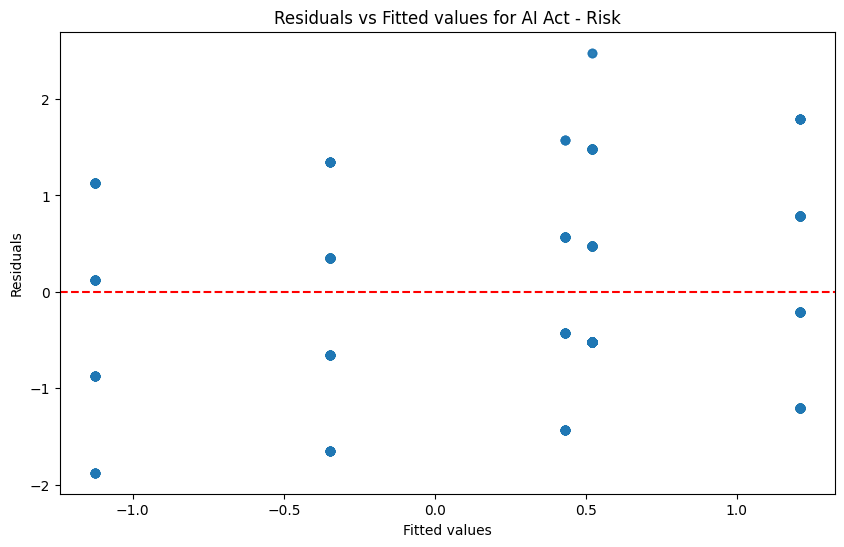

Breusch-Pagan test results (initial): {'Lagrange multiplier statistic': 29.1147766751102, 'p-value': 4.762188413869474e-07, 'f-value': 14.948951558701085, 'f p-value': 4.010456363660934e-07}


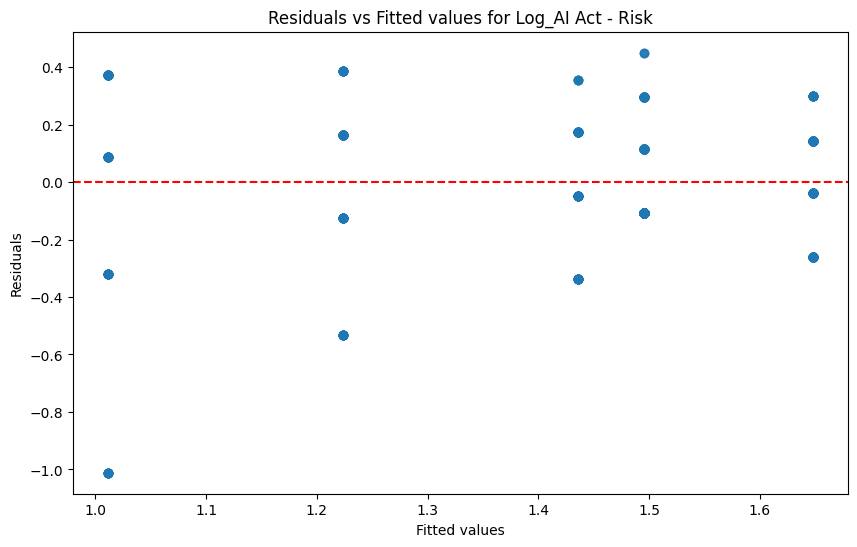

Breusch-Pagan test results (log-transformed): {'Lagrange multiplier statistic': 154.9791055345663, 'p-value': 2.22185047175731e-34, 'f-value': 91.42624119117751, 'f p-value': 3.4948028033336414e-37}


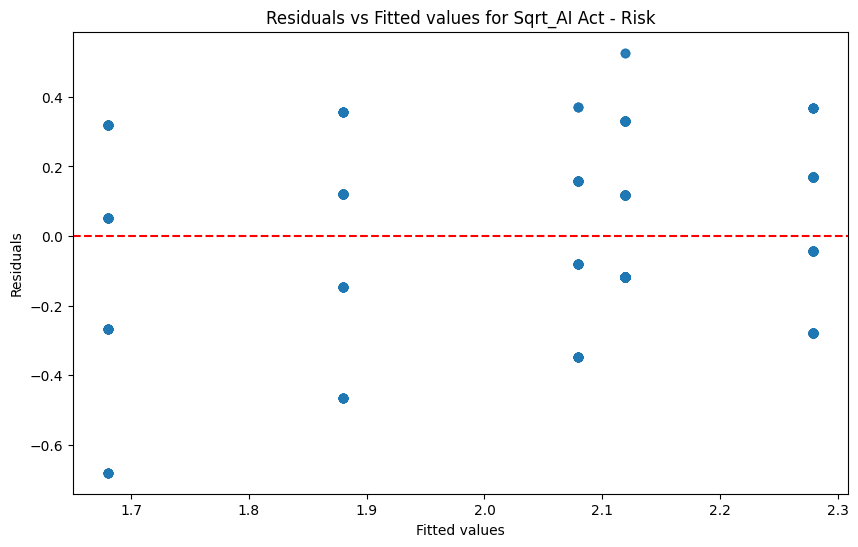

Breusch-Pagan test results (sqrt-transformed): {'Lagrange multiplier statistic': 106.67886220855705, 'p-value': 6.838792134917821e-24, 'f-value': 59.53000613244316, 'f p-value': 3.778276909044904e-25}
                            WLS Regression Results                            
Dep. Variable:          AI Act - Risk   R-squared:                       0.827
Model:                            WLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     2379.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:14:47   Log-Likelihood:                -891.07
No. Observations:                1000   AIC:                             1788.
Df Residuals:                     997   BIC:                             1803.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
         

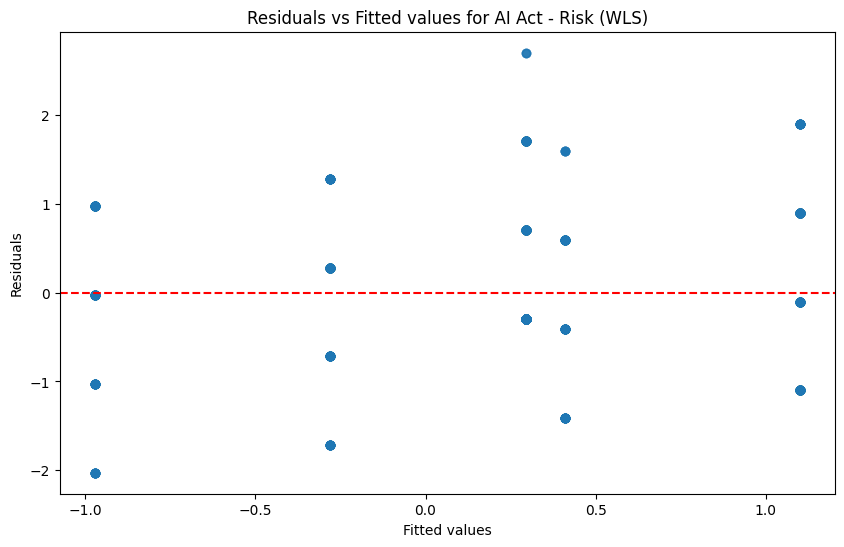

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan

# Load the data
file_path = '/Users/helgegeurtjacobusmoes/Desktop/thesis data/Merged_Official_Thesis_Coding.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract relevant columns
data = df[['AI Act - Risk', 'Risk', 'Q5 - Risk Presence']].dropna()

# Function to perform and plot OLS regression diagnostics
def ols_diagnostics(df, dependent_var, independent_vars):
    X = sm.add_constant(df[independent_vars])
    y = df[dependent_var]
    model = sm.OLS(y, X).fit()

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(model.fittedvalues, model.resid, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Fitted values for {dependent_var}')
    plt.show()

    # Breusch-Pagan test
    test = het_breuschpagan(model.resid, model.model.exog)
    labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    bp_test_results = dict(zip(labels, test))
    
    return model, bp_test_results

# Initial OLS regression diagnostics
dependent_var = 'AI Act - Risk'
independent_vars = ['Risk', 'Q5 - Risk Presence']
model, bp_test_results = ols_diagnostics(data, dependent_var, independent_vars)
print("Breusch-Pagan test results (initial):", bp_test_results)

# Log transformation of the dependent variable
data['Log_' + dependent_var] = np.log(data[dependent_var] + abs(data[dependent_var].min()) + 1)
model_log, bp_test_results_log = ols_diagnostics(data, 'Log_' + dependent_var, independent_vars)
print("Breusch-Pagan test results (log-transformed):", bp_test_results_log)

# Square root transformation of the dependent variable
data['Sqrt_' + dependent_var] = np.sqrt(data[dependent_var] + abs(data[dependent_var].min()) + 1)
model_sqrt, bp_test_results_sqrt = ols_diagnostics(data, 'Sqrt_' + dependent_var, independent_vars)
print("Breusch-Pagan test results (sqrt-transformed):", bp_test_results_sqrt)

# Weighted Least Squares (WLS)
weights = 1 / model.resid**2
model_wls = sm.WLS(data[dependent_var], sm.add_constant(data[independent_vars]), weights=weights).fit()
print(model_wls.summary())

# Robust standard errors
model_robust = sm.OLS(data[dependent_var], sm.add_constant(data[independent_vars])).fit(cov_type='HC3')
print(model_robust.summary())

# Plot residuals of the final model (WLS or Robust)
plt.figure(figsize=(10, 6))
plt.scatter(model_wls.fittedvalues, model_wls.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title(f'Residuals vs Fitted values for {dependent_var} (WLS)')
plt.show()

### Explanation of Results

#### Initial Breusch-Pagan Test
The initial Breusch-Pagan test results indicate significant heteroscedasticity:
- **Lagrange multiplier statistic**: 29.1148
- **p-value**: 4.7622e-07
- **f-value**: 14.9490
- **f p-value**: 4.0105e-07

A very low p-value (< 0.05) indicates the presence of heteroscedasticity, meaning the variance of the residuals is not constant across all levels of the independent variables.

#### Breusch-Pagan Test on Log-Transformed Data
- **Lagrange multiplier statistic**: 154.9791
- **p-value**: 2.2219e-34
- **f-value**: 91.4262
- **f p-value**: 3.4948e-37

The results for the log-transformed data show even stronger evidence of heteroscedasticity compared to the initial test. This suggests that the log transformation did not successfully stabilize the variance.

#### Breusch-Pagan Test on Square Root-Transformed Data
- **Lagrange multiplier statistic**: 106.6789
- **p-value**: 6.8388e-24
- **f-value**: 59.5300
- **f p-value**: 3.7783e-25

Similarly, the square root transformation also shows significant heteroscedasticity, indicating that this transformation did not resolve the issue either.

#### Weighted Least Squares (WLS) Regression Results
- **R-squared**: 0.827
- **Adj. R-squared**: 0.826
- **F-statistic**: 2379.0
- **Prob (F-statistic)**: 0.00

Coefficients:
- **Intercept**: 0.2964 (p < 0.0001)
- **Risk**: -0.6905 (p < 0.0001)
- **Q5 - Risk Presence**: 1.4939 (p < 0.0001)

**Diagnostics:**
- **Omnibus**: 4991.180 (p < 0.0001)
- **Durbin-Watson**: 1.751
- **Jarque-Bera (JB)**: 124.515 (p < 0.0001)
- **Skew**: 0.210
- **Kurtosis**: 1.323

The WLS model improves the R-squared value, indicating a better fit. However, the omnibus test and Jarque-Bera test suggest issues with normality, and the residuals still show signs of heteroscedasticity.

#### OLS Regression with Robust Standard Errors (HC3)
- **R-squared**: 0.388
- **Adj. R-squared**: 0.387
- **F-statistic**: 251.1 (p < 0.0001)

Coefficients:
- **Intercept**: 0.5209 (p < 0.0001)
- **Risk**: -0.7779 (p < 0.0001)
- **Q5 - Risk Presence**: 1.4653 (p < 0.0001)

**Diagnostics:**
- **Omnibus**: 42.768 (p < 0.0001)
- **Durbin-Watson**: 1.667
- **Jarque-Bera (JB)**: 22.059 (p < 0.0001)
- **Skew**: 0.174
- **Kurtosis**: 2.361

Using robust standard errors (HC3) adjusts the standard errors of the coefficients to account for heteroscedasticity. This approach doesn't change the coefficient estimates but provides more reliable standard errors and p-values in the presence of heteroscedasticity.

### Summary
- **Initial OLS**: Significant heteroscedasticity.
- **Log and Square Root Transformations**: Did not resolve heteroscedasticity.
- **WLS Regression**: Improved model fit (R-squared), but residual diagnostics still suggest issues.
- **Robust Standard Errors**: Provided more reliable inference in the presence of heteroscedasticity.

### Conclusion
WLS and robust standard errors are effective methods to address heteroscedasticity:
- **WLS**: Provides a better fit but requires careful residual diagnostics.
- **Robust Standard Errors (HC3)**: Adjusts standard errors for reliable inference without changing coefficient estimates.

The choice between these methods depends on the context and specific needs of the analysis. For better model fit, WLS is preferred. For reliable inference without changing the model, robust standard errors are used.

## SPSS

In the following code the data is prepared for further analysis with SPSS.

In [3]:
# Load the provided Excel file
file_path = '/Users/helgegeurtjacobusmoes/Desktop/thesis data/Merged_Official_Thesis_Coding.xlsx'
data = pd.read_excel(file_path)

# Create dummy variables for 'Topic'
topic_dummies = pd.get_dummies(data['Topic'], prefix='Topic')

# Categorize news outlets into tabloids and broadsheets
news_outlet_categories = {
    'De Telegraaf': 'Tabloid',
    'AD/Algemeen Dagblad': 'Tabloid',
    'NRC': 'Broadsheet',
    'Volkskrant': 'Broadsheet',
    'Trouw': 'Broadsheet',
    'Het Financieele Dagblad': 'Broadsheet'
}
data['News Outlet Category'] = data['News Outlet'].map(news_outlet_categories)

# Create dummy variables for 'News Outlet Category'
news_outlet_dummies = pd.get_dummies(data['News Outlet Category'], prefix='Outlet')

# Select relevant columns for logistic regression
selected_columns = [
    'Q5 - Risk Presence',
    'AI Act',
    'Risk',
    'Updated AI Act',  
    'Updated Risk',  
    'Publication Date',  
]

# Combine all dummy variables with the selected columns
prepared_data = pd.concat([data[selected_columns], topic_dummies, news_outlet_dummies], axis=1)

# Drop rows with missing values
prepared_data = prepared_data.dropna()

# Ensure that dummy variables are 0 (False) and 1 (True)
for column in prepared_data.columns:
    if prepared_data[column].dtype == 'bool':
        prepared_data[column] = prepared_data[column].astype(int)

# Convert 'Q5 - Risk Presence' to integers (1 and 0)
prepared_data['Q5 - Risk Presence'] = prepared_data['Q5 - Risk Presence'].astype(int)

prepared_data


,Q5 - Risk Presence,AI Act,Risk,Updated AI Act,Updated Risk,Publication Date,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Outlet_Broadsheet,Outlet_Tabloid
0,1,3,1,2,0,15.04.2016,1,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,04.01.2020,1,0,0,0,0,0,0,0,0,0,1,0
2,1,3,2,2,1,26.07.2019,1,0,0,0,0,0,0,0,0,0,1,0
3,0,3,0,2,0,13.02.2019,1,0,0,0,0,0,0,0,0,0,0,1
4,0,3,0,2,0,11.01.2024,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,2,1,1,29.11.2018,0,0,0,0,0,0,0,0,0,1,1,0
996,1,3,1,2,0,11.09.2023,0,0,0,0,0,0,0,0,0,1,1,0
997,0,1,0,0,0,05.05.2023,0,0,0,0,0,0,0,0,0,1,0,1
998,1,4,3,3,2,08.01.2022,0,0,0,0,0,0,0,0,0,1,0,1


In [4]:
# Save the prepared_data to an Excel file
prepared_data.to_excel('Data_SPSS.xlsx', index=False)